# Online shoppers purchasing intention

Name : **ASHWIN P ASHOK**

Organization : **Entri Elevate**





**Introduction** : Online Shoppers Purchase Intention machine learning project, the goal is to analyze customer behavior data to predict whether a user will make a purchase or not. This project revolves around understanding patterns in online shoppers activity and using machine learning models to classify or predict purchase intentions.

**Objective** : To predict whether an online shopper will complete a purchase (yes/no or binary classification) based on their browsing behavior and other session data. This will help businesses enhance customer experience, optimize marketing strategies, and increase conversions.

**Data Collection** : The data is collected from a secondary source that is UCIrvine Machine Learning Repository. The dataset was donated to the repository and it appeared as an introductory paper Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks published in Neural computing & applications.

In [37]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


In [2]:
# Loading the Dataset

data = pd.read_csv("C:/Users/imash/OneDrive/Desktop/online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


The dataset consist of 12330 rows and 18 columns. Two columns from the visible portion seem to be of object type and another two columns seem to be Boolean. The remaining columns are in numerical form.

# Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.


# Analysing the Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Confirmed that the dataset contains two columns of object dtype and two columns of bool dtype. There seem to be no null-values in the dataset

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


From the above description it is evident that the dataset contains outliers which need to be removed

# Data Cleaning

In [5]:
#Checking for missing values

Total = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
Percent

Administrative             0.0
Administrative_Duration    0.0
Weekend                    0.0
VisitorType                0.0
TrafficType                0.0
Region                     0.0
Browser                    0.0
OperatingSystems           0.0
Month                      0.0
SpecialDay                 0.0
PageValues                 0.0
ExitRates                  0.0
BounceRates                0.0
ProductRelated_Duration    0.0
ProductRelated             0.0
Informational_Duration     0.0
Informational              0.0
Revenue                    0.0
dtype: float64

No missing values found

In [6]:
#Checking duplicates

data.duplicated().sum()

125

In [7]:
# Eliminating the duplicates

data.drop_duplicates(inplace=True)
data.shape

(12205, 18)

In [8]:
data['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

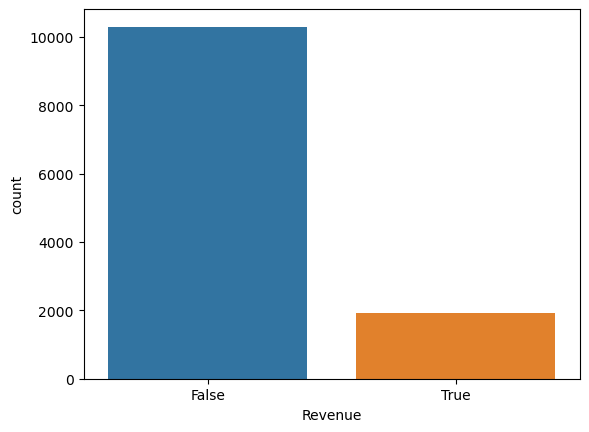

In [9]:
# Checking the distribution of customers on Revenue (Target column)

data_target = data['Revenue'].copy()
data_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)

plt.show()

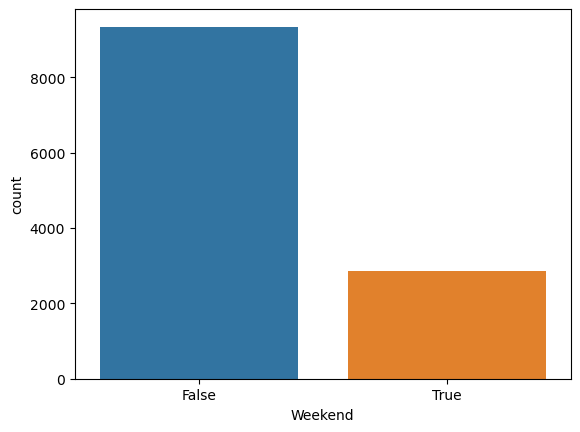

In [10]:
# Checking the distribution of customers on Weekend column

data_target = data['Weekend'].copy()
data_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)

plt.show()

What we observed here?

From the above information we see that the distribution of Revenue and Weekend data are hightly imbalanced.

# CHECKING FOR SKEWNESS

In [11]:
#Extracting the numeric data from df

numeric_data = data.select_dtypes('number')
numeric_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [12]:
numeric_data.skew()

Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64

In [13]:
numeric_columns=list(numeric_data)
numeric_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

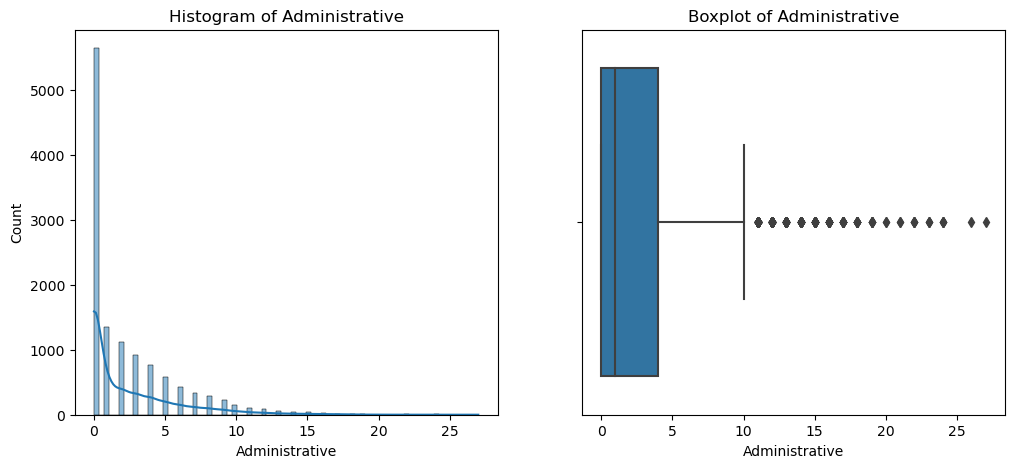

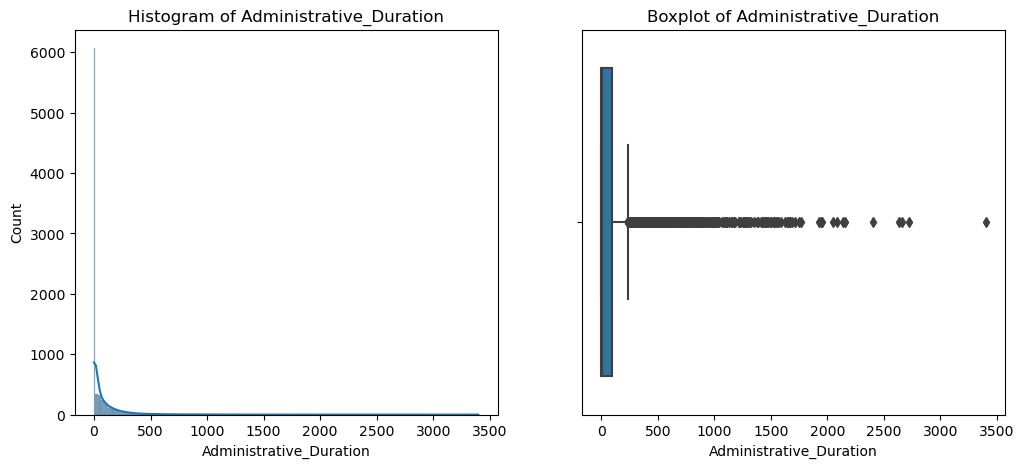

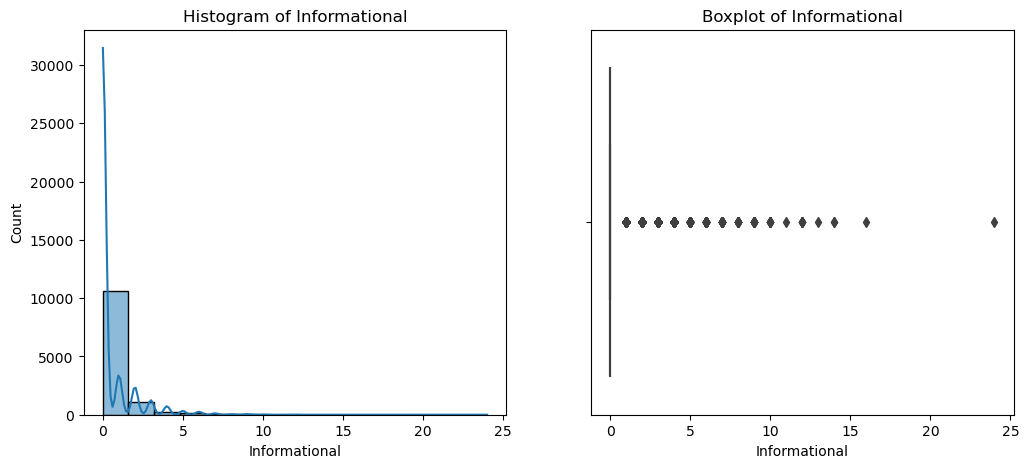

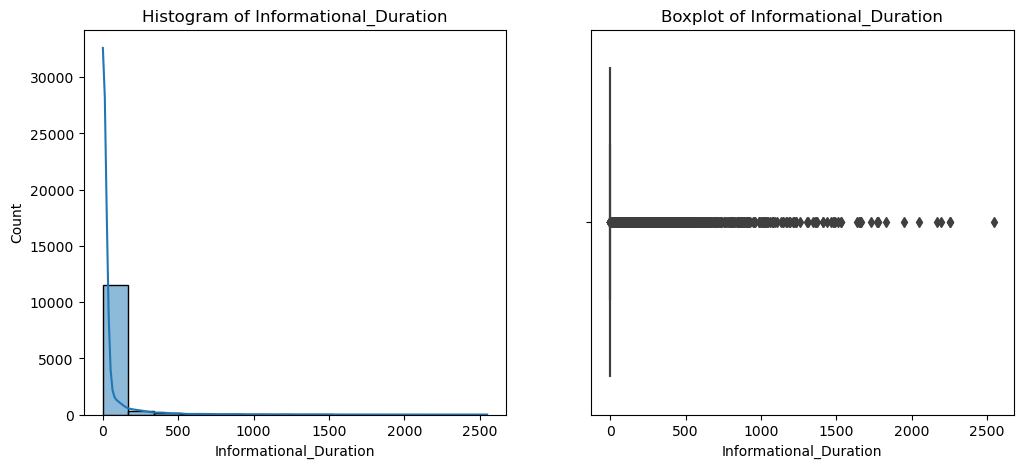

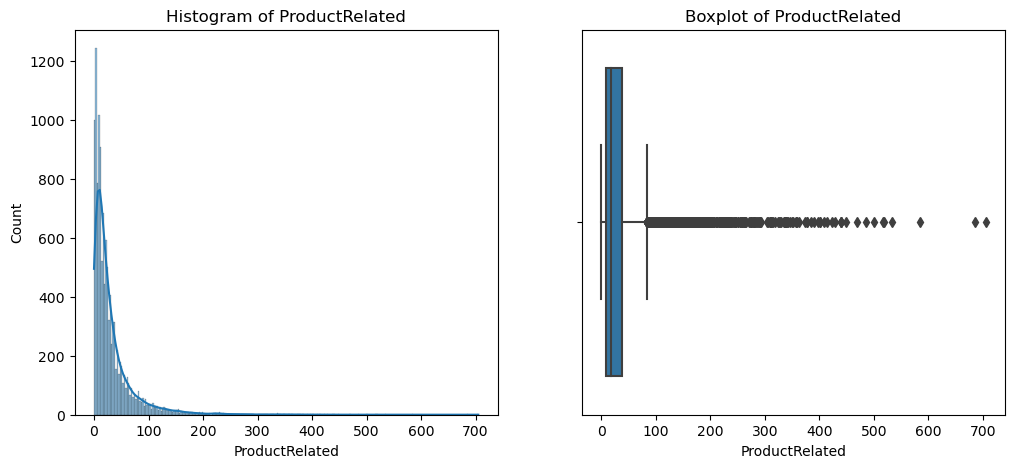

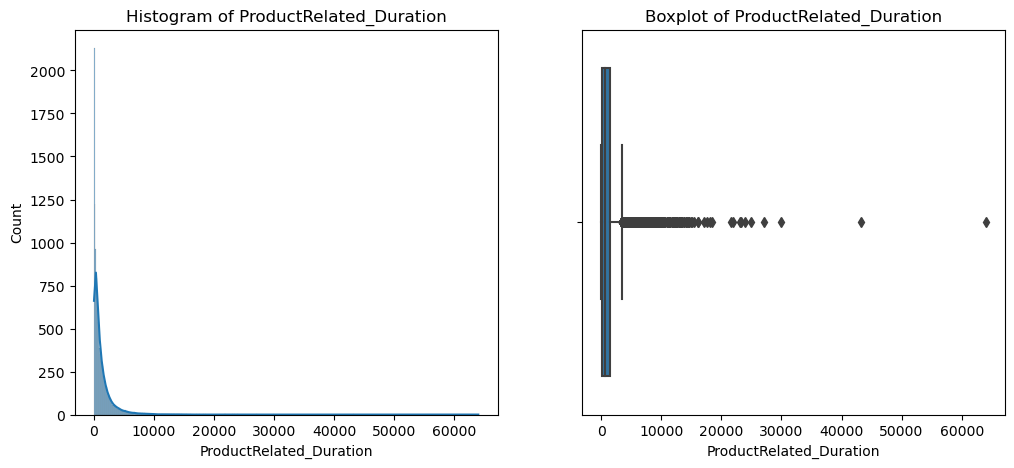

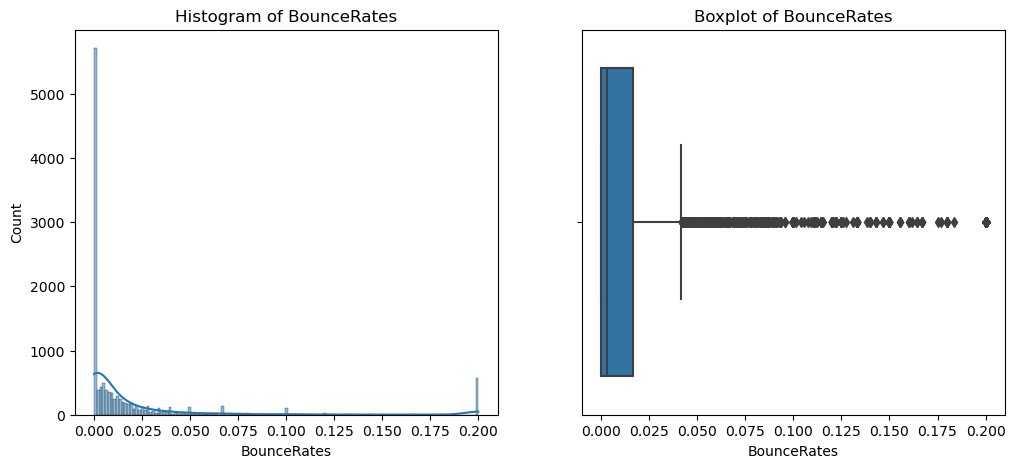

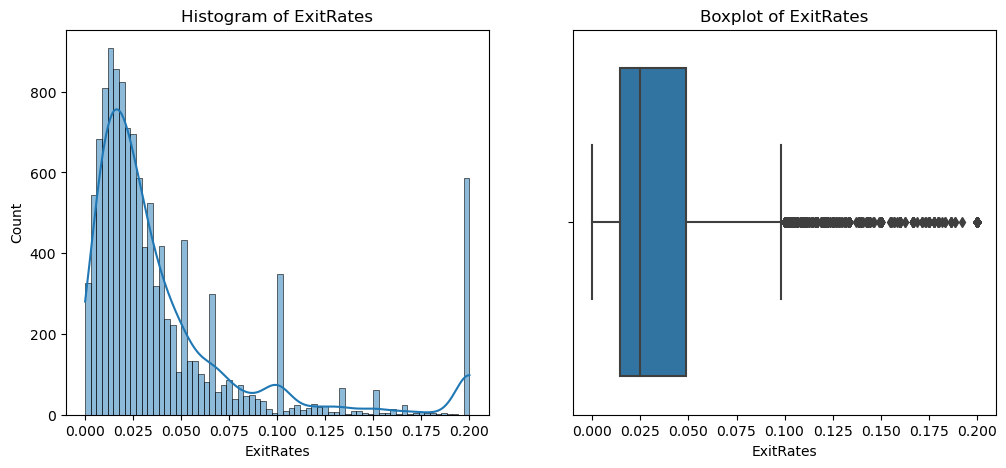

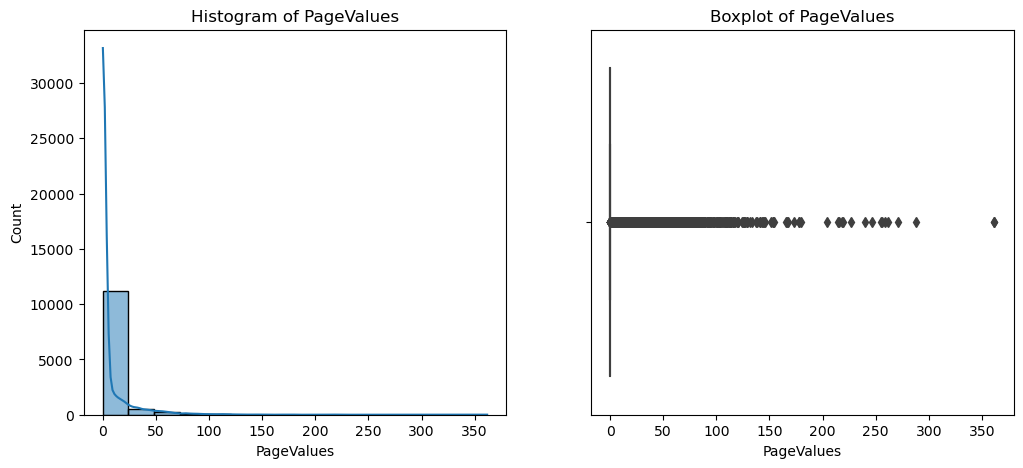

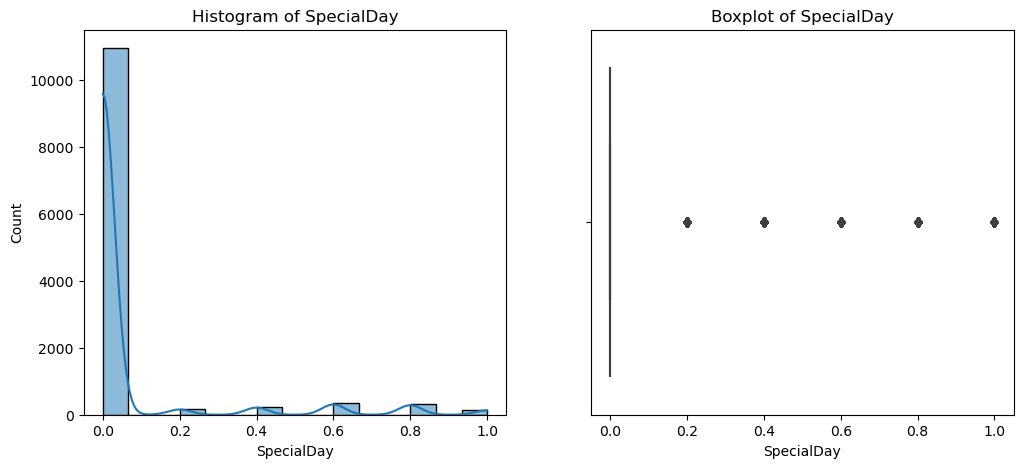

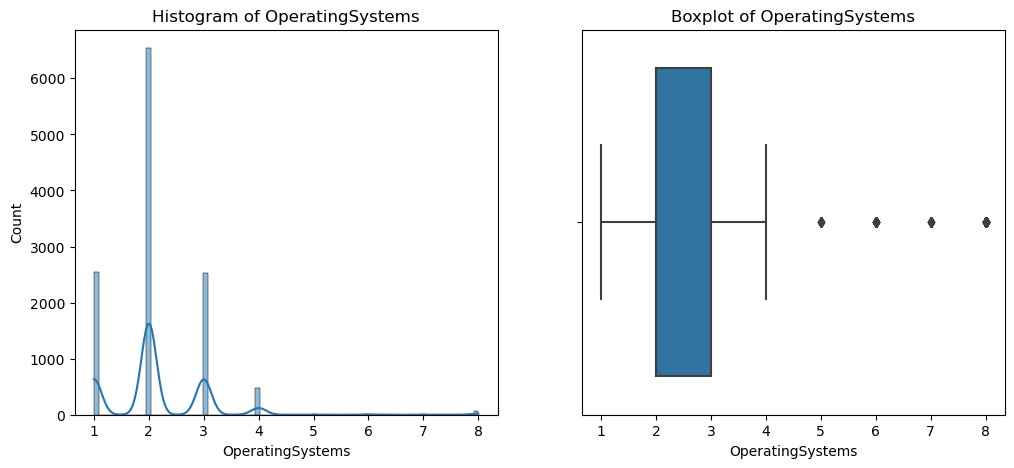

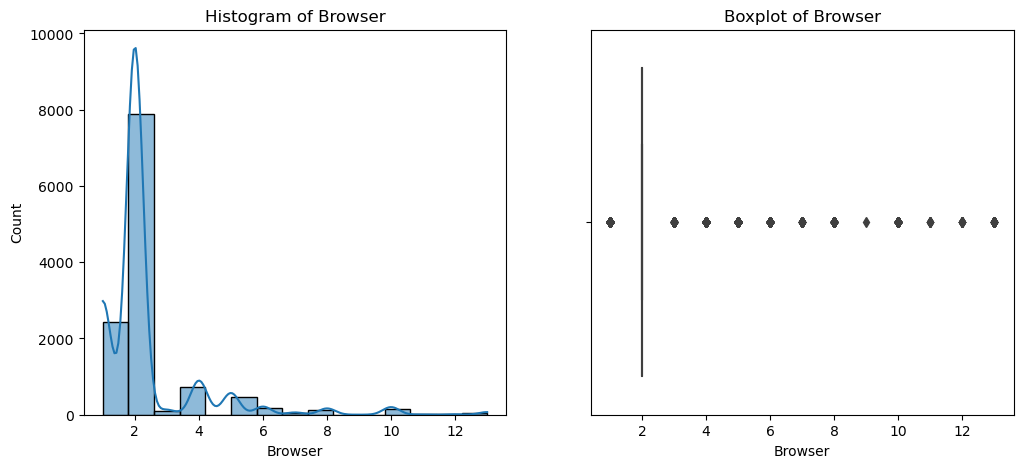

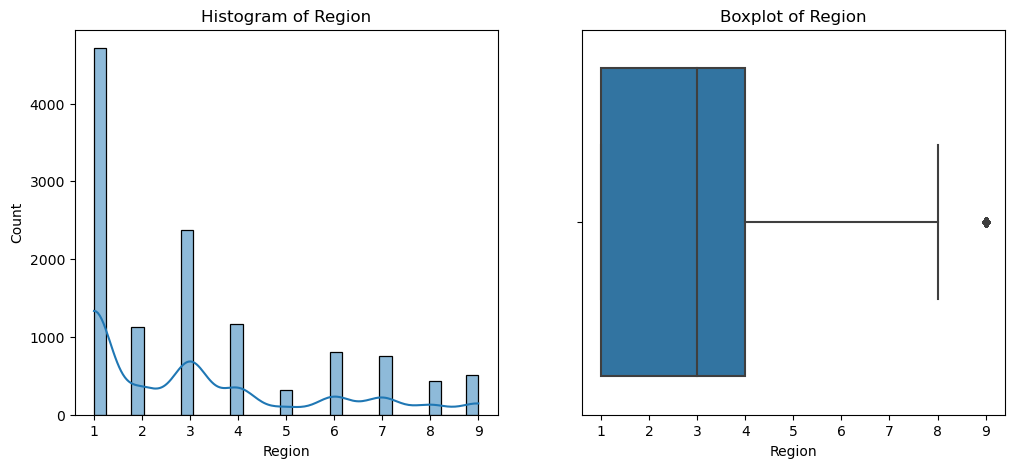

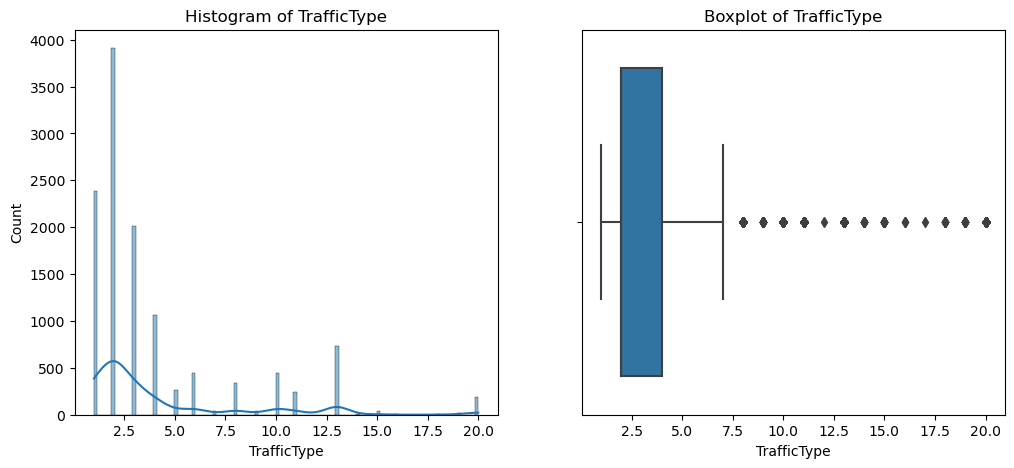

In [14]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

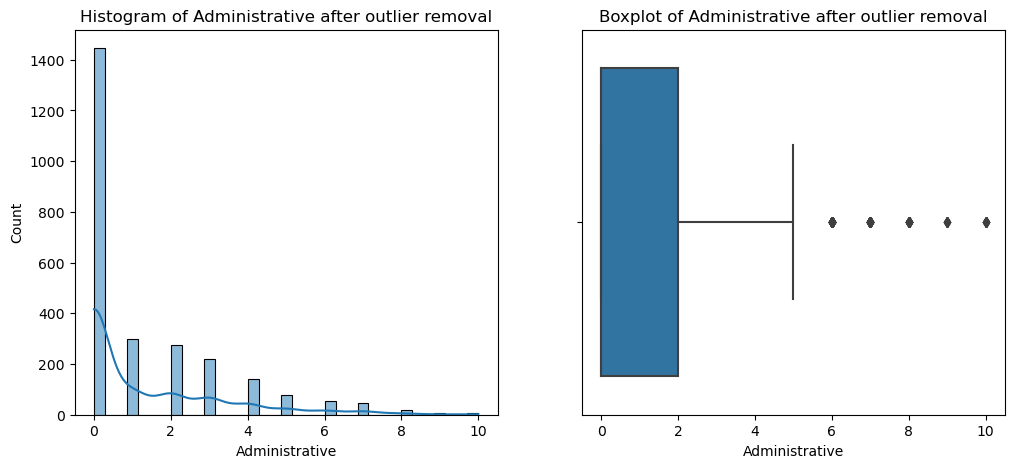

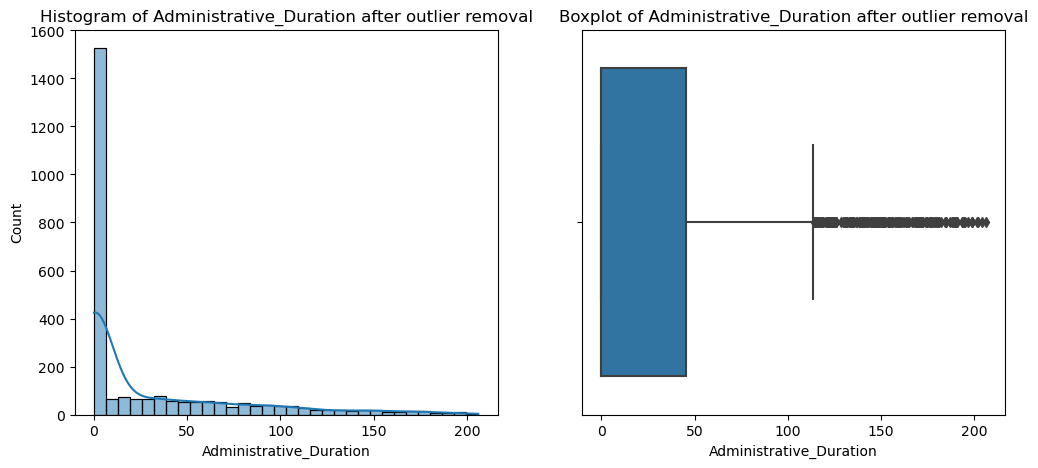

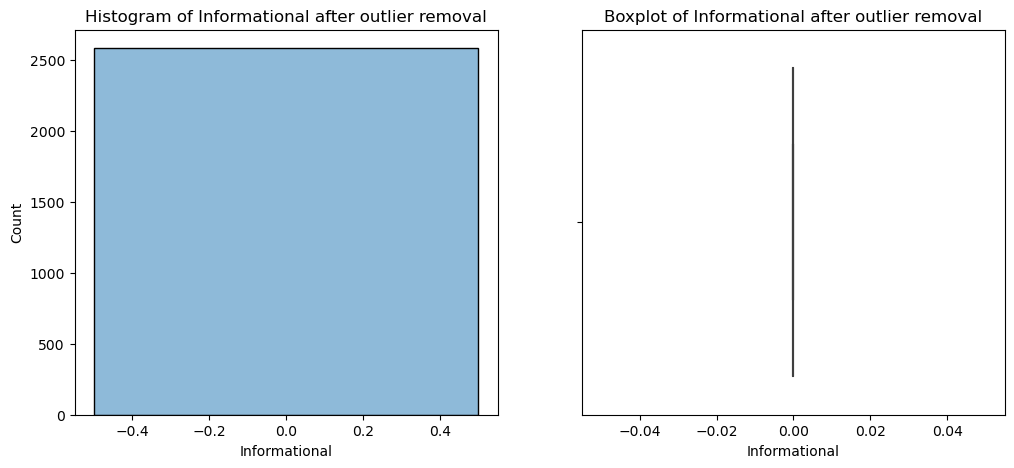

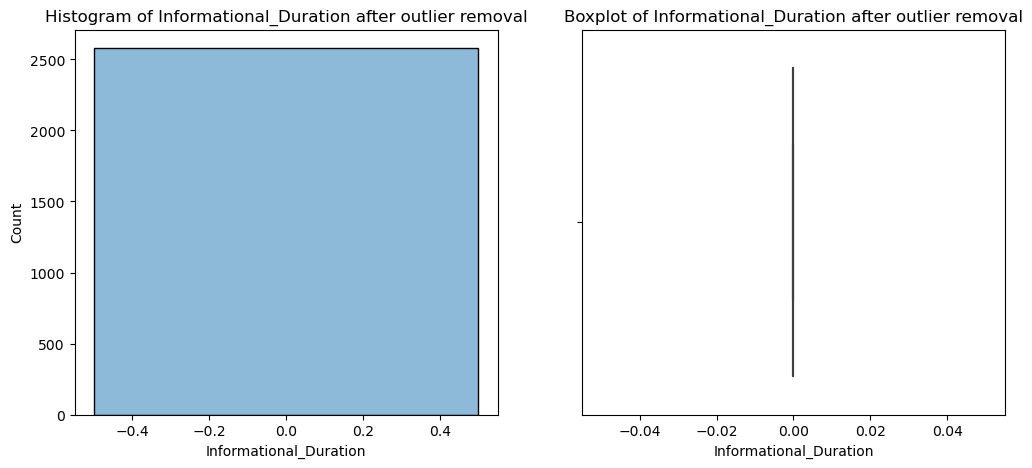

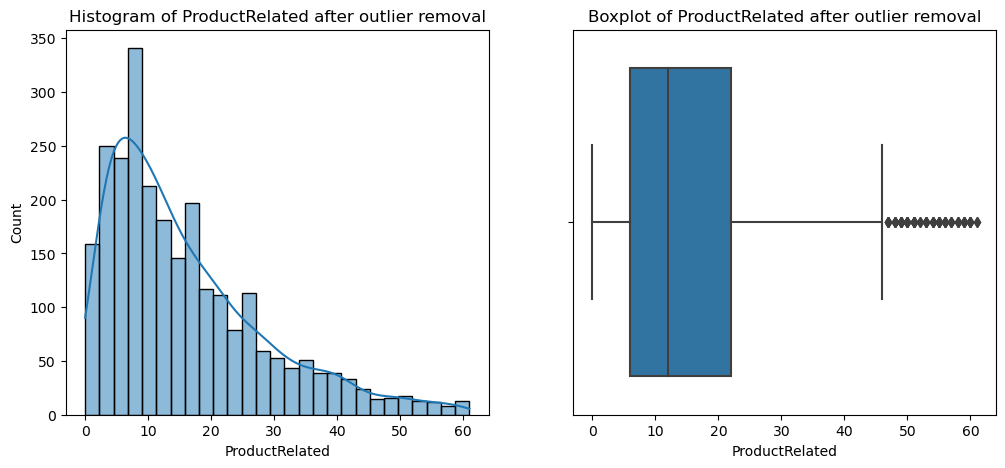

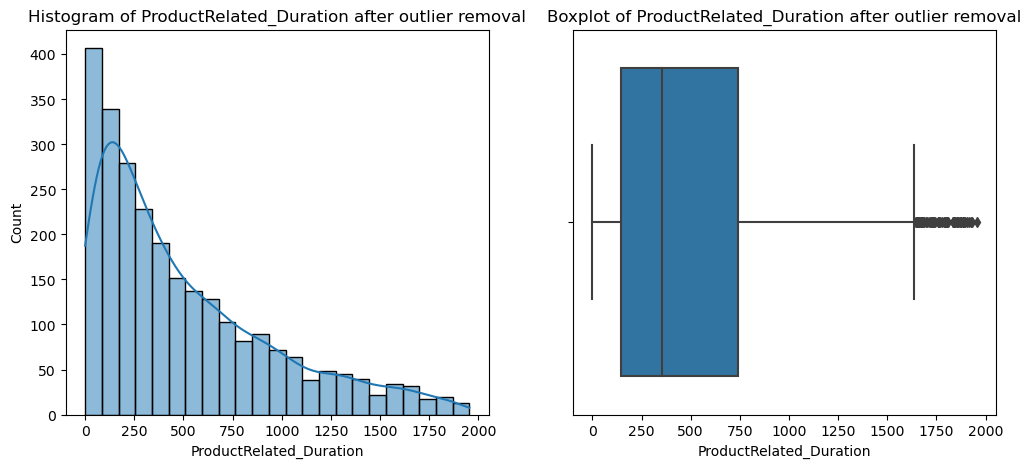

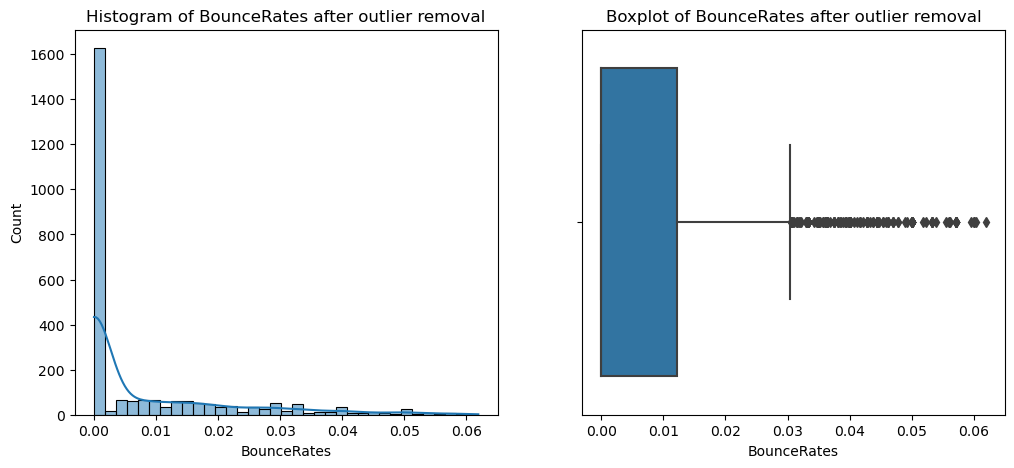

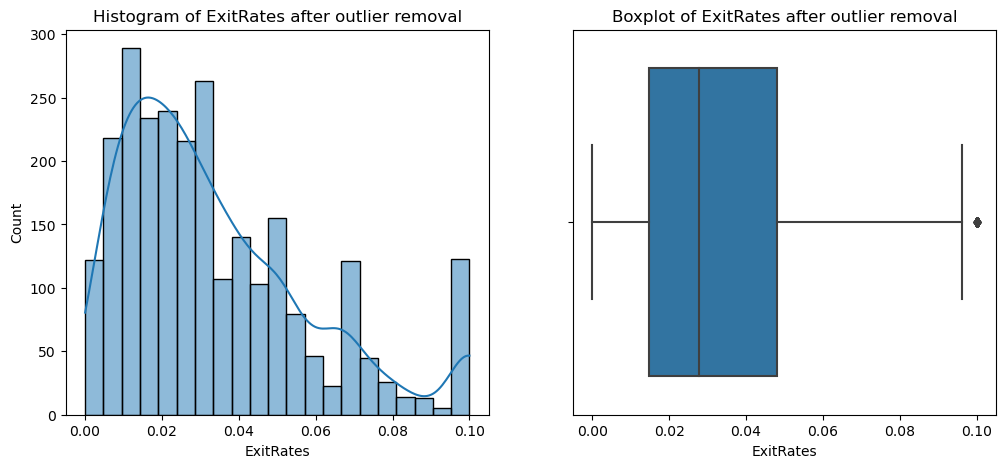

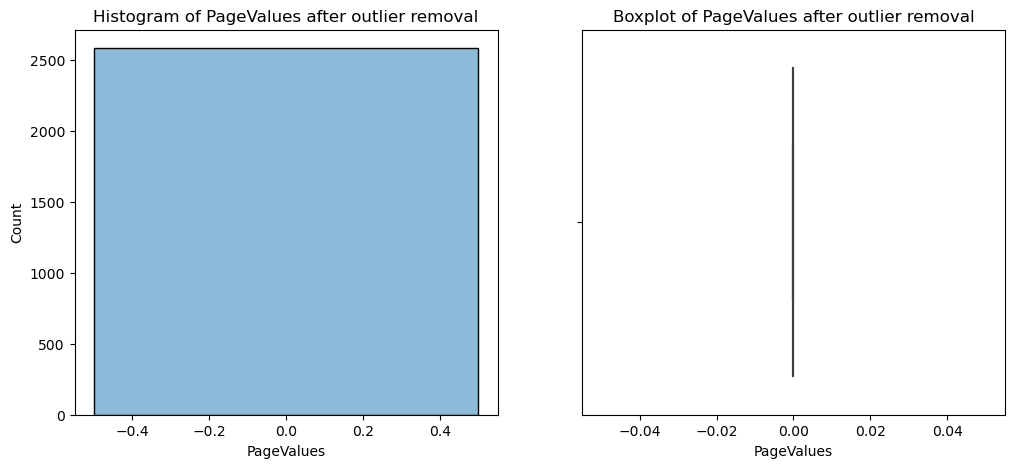

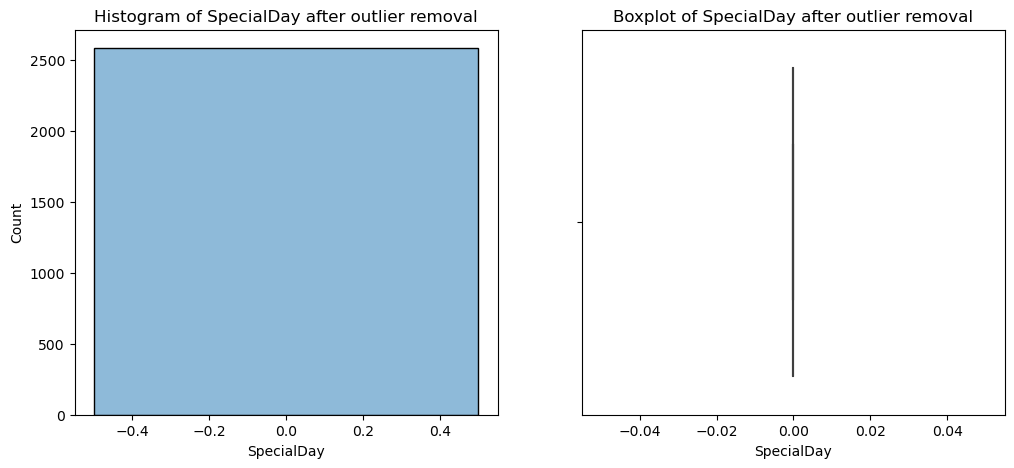

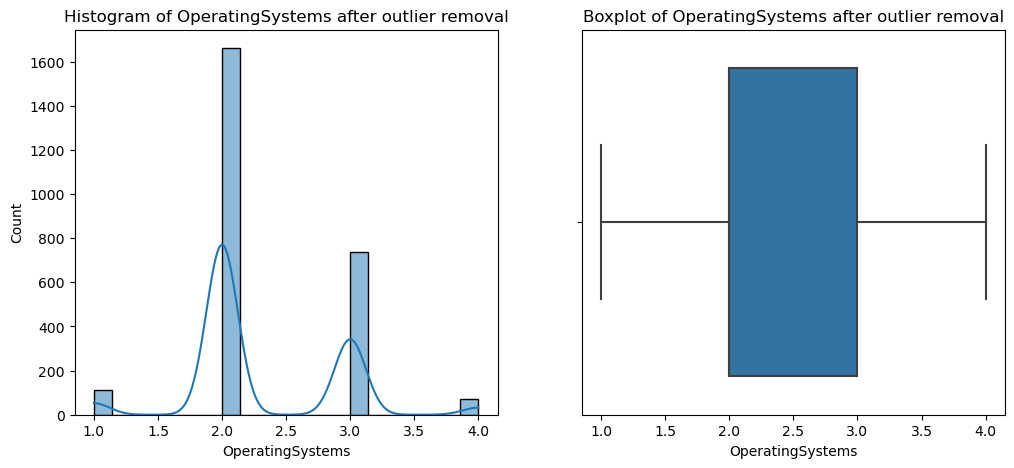

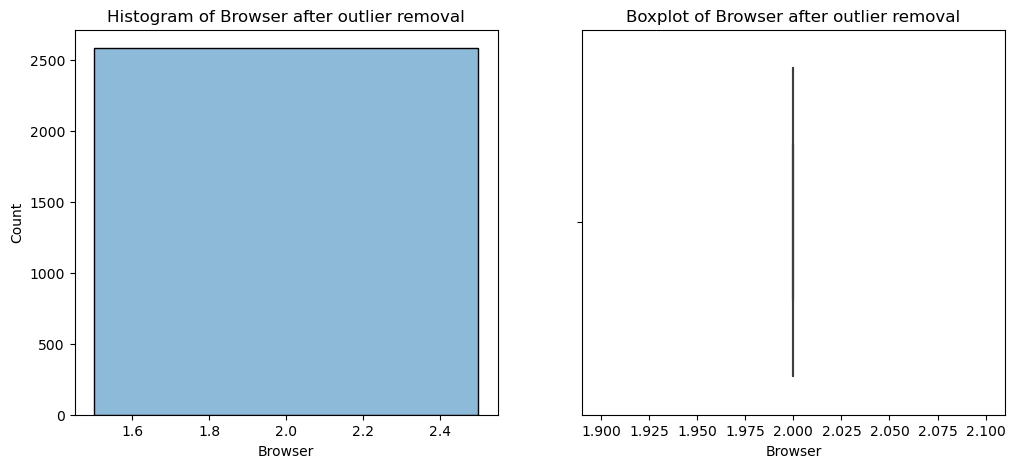

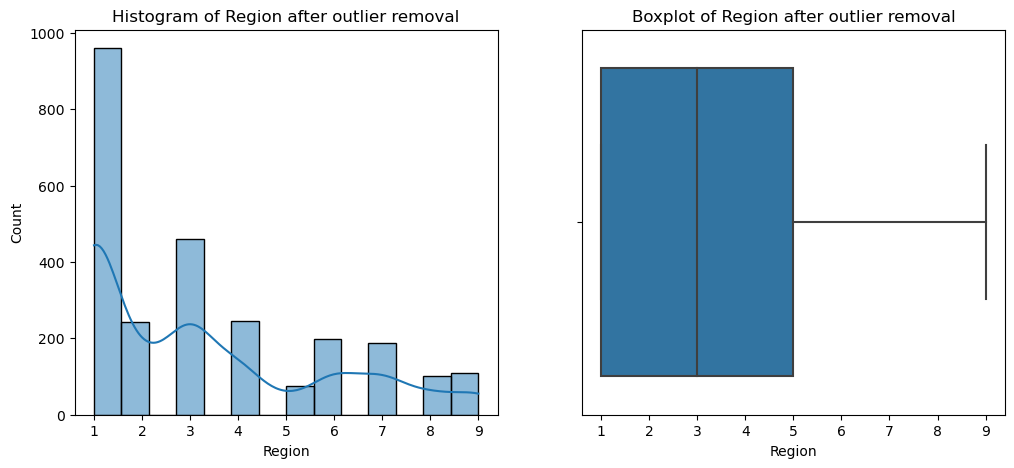

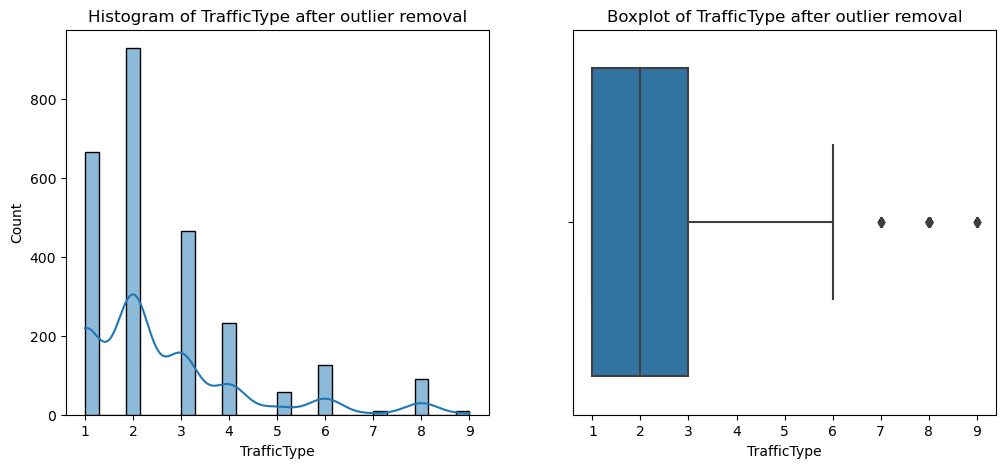

In [15]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) &  (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

In [16]:
cleaned_data.select_dtypes('number').skew()

Administrative             1.667701
Administrative_Duration    1.708851
Informational              0.000000
Informational_Duration     0.000000
ProductRelated             1.210092
ProductRelated_Duration    1.131457
BounceRates                1.834204
ExitRates                  1.048808
PageValues                 0.000000
SpecialDay                 0.000000
OperatingSystems           0.585523
Browser                    0.000000
Region                     0.853861
TrafficType                1.595479
dtype: float64

In [17]:
cleaned_data.shape

(2581, 18)

In [18]:
#checking how skewness would have turned out for log transformation

for i in numeric_columns:
    print('skewness of column {}'.format(i),' ',np.log(data[i]+1).skew())

skewness of column Administrative   0.5544061292610554
skewness of column Administrative_Duration   0.23728282948866408
skewness of column Informational   2.0128209989306827
skewness of column Informational_Duration   1.9021057311219451
skewness of column ProductRelated   -0.04015096092412998
skewness of column ProductRelated_Duration   -1.4271481971584778
skewness of column BounceRates   3.0780659913094586
skewness of column ExitRates   2.1302489017156856
skewness of column PageValues   1.789606719609043
skewness of column SpecialDay   3.104879094218661
skewness of column OperatingSystems   0.27459207619970133
skewness of column Browser   1.5329892786112327
skewness of column Region   0.369229842233823
skewness of column TrafficType   0.904719757565076


In [19]:
#checking how skewness would have turned out for sqrt transformation

for i in numeric_columns:
    print('skewness of column {}'.format(i),' ',np.sqrt(data[i]).skew())

skewness of column Administrative   0.6253029916840739
skewness of column Administrative_Duration   1.5278064328015881
skewness of column Informational   1.9333811631213869
skewness of column Informational_Duration   3.4191292009518626
skewness of column ProductRelated   1.503354042156042
skewness of column ProductRelated_Duration   1.4129766765709642
skewness of column BounceRates   1.7152557674680822
skewness of column ExitRates   1.211128100554691
skewness of column PageValues   2.515993022196887
skewness of column SpecialDay   2.8586510843566098
skewness of column OperatingSystems   0.6688191162784872
skewness of column Browser   2.0706700913946254
skewness of column Region   0.5614789784873155
skewness of column TrafficType   1.2989462263116764


# Feature selection

In [20]:
X= cleaned_data.drop('Revenue',axis=1)
y= cleaned_data['Revenue']

Here the target column is dropped and rest of the columns are kept as features

In [21]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False
14,0,0.00,0,0.0,2,68.000000,0.000000,0.100000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False
18,0,0.00,0,0.0,2,32.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False
22,0,0.00,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,Feb,3,2,1,5,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,1,5.00,0,0.0,21,411.083333,0.015789,0.016140,0.0,0.0,Nov,3,2,7,3,Returning_Visitor,False
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.0,0.0,Dec,2,2,4,2,Returning_Visitor,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True


In [22]:
y

1        False
5        False
14       False
18       False
22       False
         ...  
12310    False
12320    False
12322    False
12326    False
12329    False
Name: Revenue, Length: 2581, dtype: bool

In [23]:
cat_cleaned_data=X.select_dtypes(include="object")
cat_cleaned_data

,Month,VisitorType
1,Feb,Returning_Visitor
5,Feb,Returning_Visitor
14,Feb,Returning_Visitor
18,Feb,Returning_Visitor
22,Feb,Returning_Visitor
...,...,...
12310,Nov,Returning_Visitor
12320,Nov,Returning_Visitor
12322,Dec,Returning_Visitor
12326,Nov,Returning_Visitor


In [24]:
cat_cleaned_data_columns=list(cat_cleaned_data)
cat_cleaned_data_columns

['Month', 'VisitorType']

In [25]:
enc = OneHotEncoder()

# Fit and transform the specified categorical columns
encoded_data = enc.fit_transform(X[cat_cleaned_data_columns]).toarray()

encoded_data

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(cat_cleaned_data_columns))

# Combine the encoded DataFrame with the original cleaned_data (excluding the original categorical columns)
X = pd.concat([X.drop(columns=cat_cleaned_data_columns).reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.00,0,0.0,2,68.000000,0.000000,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.00,0,0.0,2,32.000000,0.000000,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.00,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,1,5.00,0,0.0,21,411.083333,0.015789,0.016140,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2577,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2578,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2579,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Initialize the RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [29]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                          Feature  Importance
5         ProductRelated_Duration    0.190041
7                       ExitRates    0.155325
4                  ProductRelated    0.138922
1         Administrative_Duration    0.093524
12                         Region    0.076104
6                     BounceRates    0.070108
0                  Administrative    0.051971
13                    TrafficType    0.048605
10               OperatingSystems    0.035879
22                      Month_Nov    0.028853
14                        Weekend    0.025295
16                      Month_Dec    0.012442
25        VisitorType_New_Visitor    0.012251
27  VisitorType_Returning_Visitor    0.012094
15                      Month_Aug    0.011896
18                      Month_Jul    0.008822
20                      Month_Mar    0.007374
24                      Month_Sep    0.006162
21                      Month_May    0.005898
23                      Month_Oct    0.005407
19                     Month_June 

In [30]:
# Set a threshold
threshold = 0.011

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)


Selected Features:
                          Feature  Importance
5         ProductRelated_Duration    0.190041
7                       ExitRates    0.155325
4                  ProductRelated    0.138922
1         Administrative_Duration    0.093524
12                         Region    0.076104
6                     BounceRates    0.070108
0                  Administrative    0.051971
13                    TrafficType    0.048605
10               OperatingSystems    0.035879
22                      Month_Nov    0.028853
14                        Weekend    0.025295
16                      Month_Dec    0.012442
25        VisitorType_New_Visitor    0.012251
27  VisitorType_Returning_Visitor    0.012094
15                      Month_Aug    0.011896


In [31]:
#selecting the important features as x

X_selected = X[selected_features['Feature']]
X_selected


,ProductRelated_Duration,ExitRates,ProductRelated,Administrative_Duration,Region,BounceRates,Administrative,TrafficType,OperatingSystems,Month_Nov,Weekend,Month_Dec,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug
0,64.000000,0.100000,2,0.00,1,0.000000,0,2,2,0.0,False,0.0,0.0,1.0,0.0
1,154.216667,0.024561,19,0.00,1,0.015789,0,3,2,0.0,False,0.0,0.0,1.0,0.0
2,68.000000,0.100000,2,0.00,3,0.000000,0,3,3,0.0,False,0.0,0.0,1.0,0.0
3,32.000000,0.100000,2,0.00,1,0.000000,0,3,2,0.0,False,0.0,0.0,1.0,0.0
4,105.000000,0.033333,3,0.00,1,0.000000,0,5,3,0.0,False,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,411.083333,0.016140,21,5.00,7,0.015789,1,3,3,1.0,False,0.0,0.0,1.0,0.0
2577,143.583333,0.050000,8,0.00,3,0.014286,0,1,2,1.0,False,0.0,0.0,1.0,0.0
2578,1075.250000,0.004167,22,76.25,4,0.000000,6,2,2,0.0,False,1.0,0.0,1.0,0.0
2579,465.750000,0.021333,5,0.00,1,0.000000,0,8,3,1.0,True,0.0,0.0,1.0,0.0


In [35]:
# Fit the scaler on the selected features and transform them
X_standardized = StandardScaler().fit_transform(X_selected)

# Convert the numpy array back to a DataFrame for easier handling
X_standardized = pd.DataFrame(X_standardized, columns=X_selected.columns)

# Display the standardized data
(X_standardized.head())

,ProductRelated_Duration,ExitRates,ProductRelated,Administrative_Duration,Region,BounceRates,Administrative,TrafficType,OperatingSystems,Month_Nov,Weekend,Month_Dec,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug
0,-0.968289,2.680580,-1.118874,-0.624517,-0.928165,-0.590537,-0.672238,-0.360976,-0.499679,-0.521589,-0.549745,-0.440857,-0.502299,0.505926,-0.18788
1,-0.768831,-0.372218,0.235336,-0.624517,-0.928165,0.624810,-0.672238,0.224249,-0.499679,-0.521589,-0.549745,-0.440857,-0.502299,0.505926,-0.18788
2,-0.959446,2.680580,-1.118874,-0.624517,-0.116649,-0.590537,-0.672238,0.224249,1.192803,-0.521589,-0.549745,-0.440857,-0.502299,0.505926,-0.18788
3,-1.039037,2.680580,-1.118874,-0.624517,-0.928165,-0.590537,-0.672238,0.224249,-0.499679,-0.521589,-0.549745,-0.440857,-0.502299,0.505926,-0.18788
4,-0.877643,-0.017241,-1.039215,-0.624517,-0.928165,-0.590537,-0.672238,1.394699,1.192803,-0.521589,-0.549745,-0.440857,-0.502299,0.505926,-0.18788


# Split Data into Training and Testing Sets:

In [42]:
X = X_standardized

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (2064, 15)
Testing Features Shape: (517, 15)
Training Target Shape: (2064,)
Testing Target Shape: (517,)
